In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

import pickle

In [49]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['body_mass_g'], axis = 1)
y = df_pen['body_mass_g']

## Data Pre-processing

In [6]:
# categorical_x = ['species', 'island', 'sex']
# numerical_x = X.drop(categorical_x, axis = 1).columns

In [7]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
# categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
# X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [8]:
X = pd.get_dummies(X, drop_first = True)

In [9]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,50.4,15.7,222.0,0,1,0,0,1
1,40.6,18.8,193.0,0,0,0,0,1
2,41.4,18.6,191.0,0,0,0,0,1
3,48.8,16.2,222.0,0,1,0,0,1
4,43.2,16.6,187.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
328,36.6,18.4,184.0,0,0,1,0,0
329,45.4,14.6,211.0,0,1,0,0,0
330,40.2,17.1,193.0,0,0,1,0,0
331,44.1,19.7,196.0,0,0,1,0,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [11]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [12]:
X.shape

(333, 8)

In [13]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [14]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=400)

Epoch 1/1400
8/8 [==============================] - 1s 18ms/step - loss: 18103110.0000 - val_loss: 18907966.0000
Epoch 2/1400
8/8 [==============================] - 0s 4ms/step - loss: 18102548.0000 - val_loss: 18907454.0000
Epoch 3/1400
8/8 [==============================] - 0s 4ms/step - loss: 18101976.0000 - val_loss: 18906902.0000
Epoch 4/1400
8/8 [==============================] - 0s 4ms/step - loss: 18101342.0000 - val_loss: 18906274.0000
Epoch 5/1400
8/8 [==============================] - 0s 4ms/step - loss: 18100622.0000 - val_loss: 18905546.0000
Epoch 6/1400
8/8 [==============================] - 0s 4ms/step - loss: 18099796.0000 - val_loss: 18904660.0000
Epoch 7/1400
8/8 [==============================] - 0s 4ms/step - loss: 18098782.0000 - val_loss: 18903574.0000
Epoch 8/1400
8/8 [==============================] - 0s 4ms/step - loss: 18097522.0000 - val_loss: 18902238.0000
Epoch 9/1400
8/8 [==============================] - 0s 4ms/step - loss: 18096014.0000 - val_loss: 18900

8/8 [==============================] - 0s 4ms/step - loss: 12970693.0000 - val_loss: 13508114.0000
Epoch 74/1400
8/8 [==============================] - 0s 4ms/step - loss: 12707410.0000 - val_loss: 13235802.0000
Epoch 75/1400
8/8 [==============================] - 0s 4ms/step - loss: 12436024.0000 - val_loss: 12952628.0000
Epoch 76/1400
8/8 [==============================] - 0s 4ms/step - loss: 12158431.0000 - val_loss: 12662602.0000
Epoch 77/1400
8/8 [==============================] - 0s 4ms/step - loss: 11873745.0000 - val_loss: 12366979.0000
Epoch 78/1400
8/8 [==============================] - 0s 4ms/step - loss: 11579812.0000 - val_loss: 12067608.0000
Epoch 79/1400
8/8 [==============================] - 0s 4ms/step - loss: 11288091.0000 - val_loss: 11754049.0000
Epoch 80/1400
8/8 [==============================] - 0s 4ms/step - loss: 10984825.0000 - val_loss: 11439624.0000
Epoch 81/1400
8/8 [==============================] - 0s 4ms/step - loss: 10674936.0000 - val_loss: 11123244.00

8/8 [==============================] - 0s 4ms/step - loss: 376225.8125 - val_loss: 411173.3125
Epoch 147/1400
8/8 [==============================] - 0s 4ms/step - loss: 369933.8438 - val_loss: 403858.0000
Epoch 148/1400
8/8 [==============================] - 0s 4ms/step - loss: 364380.1875 - val_loss: 397243.8125
Epoch 149/1400
8/8 [==============================] - 0s 4ms/step - loss: 359089.5938 - val_loss: 391218.6875
Epoch 150/1400
8/8 [==============================] - 0s 4ms/step - loss: 353992.9375 - val_loss: 386360.1875
Epoch 151/1400
8/8 [==============================] - 0s 4ms/step - loss: 350499.4062 - val_loss: 380985.9688
Epoch 152/1400
8/8 [==============================] - 0s 4ms/step - loss: 346511.8438 - val_loss: 376562.7188
Epoch 153/1400
8/8 [==============================] - 0s 4ms/step - loss: 342820.2500 - val_loss: 372182.5938
Epoch 154/1400
8/8 [==============================] - 0s 4ms/step - loss: 339624.3438 - val_loss: 368469.1250
Epoch 155/1400
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 259234.3125 - val_loss: 272267.1250
Epoch 221/1400
8/8 [==============================] - 0s 4ms/step - loss: 258338.1250 - val_loss: 271038.3438
Epoch 222/1400
8/8 [==============================] - 0s 4ms/step - loss: 257590.9844 - val_loss: 269800.1562
Epoch 223/1400
8/8 [==============================] - 0s 4ms/step - loss: 256728.9688 - val_loss: 269066.5625
Epoch 224/1400
8/8 [==============================] - 0s 4ms/step - loss: 255849.4219 - val_loss: 268132.8438
Epoch 225/1400
8/8 [==============================] - 0s 4ms/step - loss: 255035.3594 - val_loss: 267427.1250
Epoch 226/1400
8/8 [==============================] - 0s 4ms/step - loss: 254118.8906 - val_loss: 266593.1250
Epoch 227/1400
8/8 [==============================] - 0s 4ms/step - loss: 253276.9062 - val_loss: 266021.8750
Epoch 228/1400
8/8 [==============================] - 0s 4ms/step - loss: 252308.0625 - val_loss: 265527.8125
Epoch 229/1400
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 201773.3281 - val_loss: 211350.9062
Epoch 295/1400
8/8 [==============================] - 0s 4ms/step - loss: 201111.7188 - val_loss: 210996.9062
Epoch 296/1400
8/8 [==============================] - 0s 4ms/step - loss: 200447.2500 - val_loss: 210168.4219
Epoch 297/1400
8/8 [==============================] - 0s 4ms/step - loss: 199742.9219 - val_loss: 209451.2344
Epoch 298/1400
8/8 [==============================] - 0s 4ms/step - loss: 199009.9062 - val_loss: 208746.5156
Epoch 299/1400
8/8 [==============================] - 0s 4ms/step - loss: 198427.1406 - val_loss: 207623.2656
Epoch 300/1400
8/8 [==============================] - 0s 4ms/step - loss: 197745.8125 - val_loss: 207025.4844
Epoch 301/1400
8/8 [==============================] - 0s 4ms/step - loss: 197136.8281 - val_loss: 206480.8438
Epoch 302/1400
8/8 [==============================] - 0s 4ms/step - loss: 196534.5781 - val_loss: 205638.0781
Epoch 303/1400
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 160546.0156 - val_loss: 171875.0156
Epoch 369/1400
8/8 [==============================] - 0s 4ms/step - loss: 160168.2500 - val_loss: 171098.5938
Epoch 370/1400
8/8 [==============================] - 0s 4ms/step - loss: 159730.8438 - val_loss: 170595.4062
Epoch 371/1400
8/8 [==============================] - 0s 4ms/step - loss: 159342.2031 - val_loss: 170367.1250
Epoch 372/1400
8/8 [==============================] - 0s 4ms/step - loss: 159027.2812 - val_loss: 170182.7812
Epoch 373/1400
8/8 [==============================] - 0s 4ms/step - loss: 158504.6406 - val_loss: 169630.6875
Epoch 374/1400
8/8 [==============================] - 0s 4ms/step - loss: 158172.3125 - val_loss: 168690.7344
Epoch 375/1400
8/8 [==============================] - 0s 4ms/step - loss: 157738.5312 - val_loss: 168096.9375
Epoch 376/1400
8/8 [==============================] - 0s 4ms/step - loss: 157321.9531 - val_loss: 167879.0625
Epoch 377/1400
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 135749.9531 - val_loss: 152019.5781
Epoch 443/1400
8/8 [==============================] - 0s 4ms/step - loss: 135648.3906 - val_loss: 152412.4062
Epoch 444/1400
8/8 [==============================] - 0s 4ms/step - loss: 135214.6562 - val_loss: 152802.9375
Epoch 445/1400
8/8 [==============================] - 0s 4ms/step - loss: 134932.6719 - val_loss: 152515.9062
Epoch 446/1400
8/8 [==============================] - 0s 4ms/step - loss: 134604.3750 - val_loss: 152550.0469
Epoch 447/1400
8/8 [==============================] - 0s 4ms/step - loss: 134377.6250 - val_loss: 152050.6562
Epoch 448/1400
8/8 [==============================] - 0s 4ms/step - loss: 134276.5312 - val_loss: 151863.9844
Epoch 449/1400
8/8 [==============================] - 0s 4ms/step - loss: 133900.6875 - val_loss: 151434.4844
Epoch 450/1400
8/8 [==============================] - 0s 4ms/step - loss: 133649.5938 - val_loss: 151377.1406
Epoch 451/1400
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 118900.1953 - val_loss: 139861.5156
Epoch 517/1400
8/8 [==============================] - 0s 4ms/step - loss: 118872.6406 - val_loss: 139305.3438
Epoch 518/1400
8/8 [==============================] - 0s 4ms/step - loss: 118412.0859 - val_loss: 138967.0625
Epoch 519/1400
8/8 [==============================] - 0s 4ms/step - loss: 118206.7656 - val_loss: 138396.7656
Epoch 520/1400
8/8 [==============================] - 0s 4ms/step - loss: 118087.3125 - val_loss: 138086.4531
Epoch 521/1400
8/8 [==============================] - 0s 4ms/step - loss: 117938.0000 - val_loss: 138696.1250
Epoch 522/1400
8/8 [==============================] - 0s 4ms/step - loss: 117629.8281 - val_loss: 138467.7812
Epoch 523/1400
8/8 [==============================] - 0s 4ms/step - loss: 117427.4531 - val_loss: 138504.6875
Epoch 524/1400
8/8 [==============================] - 0s 4ms/step - loss: 117240.8047 - val_loss: 138830.6719
Epoch 525/1400
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 105604.4844 - val_loss: 131486.3281
Epoch 591/1400
8/8 [==============================] - 0s 4ms/step - loss: 105622.7812 - val_loss: 132522.8125
Epoch 592/1400
8/8 [==============================] - 0s 4ms/step - loss: 105460.0859 - val_loss: 132953.6719
Epoch 593/1400
8/8 [==============================] - 0s 4ms/step - loss: 105319.4922 - val_loss: 132239.3438
Epoch 594/1400
8/8 [==============================] - 0s 4ms/step - loss: 105155.7578 - val_loss: 131760.3906
Epoch 595/1400
8/8 [==============================] - 0s 4ms/step - loss: 104875.6406 - val_loss: 131323.1250
Epoch 596/1400
8/8 [==============================] - 0s 4ms/step - loss: 104767.2031 - val_loss: 130554.4609
Epoch 597/1400
8/8 [==============================] - 0s 4ms/step - loss: 104666.3438 - val_loss: 130038.6016
Epoch 598/1400
8/8 [==============================] - 0s 4ms/step - loss: 104356.9688 - val_loss: 130217.0391
Epoch 599/1400
8/8 [=====

Epoch 665/1400
8/8 [==============================] - 0s 4ms/step - loss: 95413.8906 - val_loss: 125233.6016
Epoch 666/1400
8/8 [==============================] - 0s 4ms/step - loss: 95380.0938 - val_loss: 124370.1875
Epoch 667/1400
8/8 [==============================] - 0s 4ms/step - loss: 95215.2656 - val_loss: 124221.5391
Epoch 668/1400
8/8 [==============================] - 0s 4ms/step - loss: 95088.8516 - val_loss: 123822.3906
Epoch 669/1400
8/8 [==============================] - 0s 4ms/step - loss: 94936.4844 - val_loss: 123163.1875
Epoch 670/1400
8/8 [==============================] - 0s 4ms/step - loss: 94811.4766 - val_loss: 122934.6797
Epoch 671/1400
8/8 [==============================] - 0s 4ms/step - loss: 94673.8047 - val_loss: 123087.8203
Epoch 672/1400
8/8 [==============================] - 0s 4ms/step - loss: 94585.6719 - val_loss: 123378.3203
Epoch 673/1400
8/8 [==============================] - 0s 4ms/step - loss: 94674.0859 - val_loss: 124495.2578
Epoch 674/1400
8/8 

8/8 [==============================] - 0s 4ms/step - loss: 87882.9609 - val_loss: 121232.8594
Epoch 741/1400
8/8 [==============================] - 0s 4ms/step - loss: 87764.4688 - val_loss: 120637.1406
Epoch 742/1400
8/8 [==============================] - 0s 4ms/step - loss: 87817.5156 - val_loss: 119860.1719
Epoch 743/1400
8/8 [==============================] - 0s 4ms/step - loss: 87615.0391 - val_loss: 120659.8672
Epoch 744/1400
8/8 [==============================] - 0s 4ms/step - loss: 87772.1719 - val_loss: 121356.4922
Epoch 745/1400
8/8 [==============================] - 0s 4ms/step - loss: 87498.2812 - val_loss: 120913.8984
Epoch 746/1400
8/8 [==============================] - 0s 4ms/step - loss: 87423.3281 - val_loss: 120728.5000
Epoch 747/1400
8/8 [==============================] - 0s 4ms/step - loss: 87294.6250 - val_loss: 121306.5000
Epoch 748/1400
8/8 [==============================] - 0s 4ms/step - loss: 87202.0938 - val_loss: 121557.1094
Epoch 749/1400
8/8 [==============

8/8 [==============================] - 0s 4ms/step - loss: 82214.8438 - val_loss: 117272.9766
Epoch 816/1400
8/8 [==============================] - 0s 4ms/step - loss: 81949.4844 - val_loss: 116869.6484
Epoch 817/1400
8/8 [==============================] - 0s 4ms/step - loss: 82177.6250 - val_loss: 117352.5000
Epoch 818/1400
8/8 [==============================] - 0s 4ms/step - loss: 81980.7734 - val_loss: 117271.8984
Epoch 819/1400
8/8 [==============================] - 0s 4ms/step - loss: 81935.5078 - val_loss: 117226.1406
Epoch 820/1400
8/8 [==============================] - 0s 4ms/step - loss: 81868.1406 - val_loss: 116062.0234
Epoch 821/1400
8/8 [==============================] - 0s 4ms/step - loss: 81968.3828 - val_loss: 116581.6875
Epoch 822/1400
8/8 [==============================] - 0s 4ms/step - loss: 81759.4922 - val_loss: 115716.8516
Epoch 823/1400
8/8 [==============================] - 0s 4ms/step - loss: 81642.7344 - val_loss: 115853.0312
Epoch 824/1400
8/8 [==============

8/8 [==============================] - 0s 4ms/step - loss: 78002.8203 - val_loss: 115567.9297
Epoch 891/1400
8/8 [==============================] - 0s 4ms/step - loss: 77829.6172 - val_loss: 115782.6484
Epoch 892/1400
8/8 [==============================] - 0s 4ms/step - loss: 77861.2734 - val_loss: 116283.7891
Epoch 893/1400
8/8 [==============================] - 0s 4ms/step - loss: 77802.6953 - val_loss: 114939.3984
Epoch 894/1400
8/8 [==============================] - 0s 4ms/step - loss: 77594.0625 - val_loss: 114157.3438
Epoch 895/1400
8/8 [==============================] - 0s 4ms/step - loss: 77787.1484 - val_loss: 113797.9297
Epoch 896/1400
8/8 [==============================] - 0s 4ms/step - loss: 77686.0625 - val_loss: 113872.8906
Epoch 897/1400
8/8 [==============================] - 0s 4ms/step - loss: 77641.1953 - val_loss: 114977.6406
Epoch 898/1400
8/8 [==============================] - 0s 4ms/step - loss: 77580.4141 - val_loss: 115279.0625
Epoch 899/1400
8/8 [==============

8/8 [==============================] - 0s 4ms/step - loss: 74790.1797 - val_loss: 111981.1328
Epoch 966/1400
8/8 [==============================] - 0s 4ms/step - loss: 74755.0156 - val_loss: 112424.8828
Epoch 967/1400
8/8 [==============================] - 0s 4ms/step - loss: 74678.3125 - val_loss: 112835.4922
Epoch 968/1400
8/8 [==============================] - 0s 4ms/step - loss: 74891.5781 - val_loss: 113683.6875
Epoch 969/1400
8/8 [==============================] - 0s 4ms/step - loss: 74662.7812 - val_loss: 113132.2734
Epoch 970/1400
8/8 [==============================] - 0s 4ms/step - loss: 74654.8359 - val_loss: 112508.8203
Epoch 971/1400
8/8 [==============================] - 0s 4ms/step - loss: 74558.8516 - val_loss: 112198.8906
Epoch 972/1400
8/8 [==============================] - 0s 4ms/step - loss: 74621.6797 - val_loss: 112355.5703
Epoch 973/1400
8/8 [==============================] - 0s 4ms/step - loss: 74702.1719 - val_loss: 113709.2109
Epoch 974/1400
8/8 [==============

Epoch 1040/1400
8/8 [==============================] - 0s 4ms/step - loss: 72534.6172 - val_loss: 110714.2188
Epoch 1041/1400
8/8 [==============================] - 0s 4ms/step - loss: 72413.1406 - val_loss: 110307.6797
Epoch 1042/1400
8/8 [==============================] - 0s 4ms/step - loss: 72387.4453 - val_loss: 110725.2969
Epoch 1043/1400
8/8 [==============================] - 0s 4ms/step - loss: 72396.2344 - val_loss: 111234.7188
Epoch 1044/1400
8/8 [==============================] - 0s 4ms/step - loss: 72358.5781 - val_loss: 110837.6172
Epoch 1045/1400
8/8 [==============================] - 0s 4ms/step - loss: 72372.7891 - val_loss: 110258.1875
Epoch 1046/1400
8/8 [==============================] - 0s 4ms/step - loss: 72237.0703 - val_loss: 109756.7812
Epoch 1047/1400
8/8 [==============================] - 0s 4ms/step - loss: 72353.9453 - val_loss: 108950.6484
Epoch 1048/1400
8/8 [==============================] - 0s 4ms/step - loss: 72254.8828 - val_loss: 108784.0625
Epoch 1049

8/8 [==============================] - 0s 4ms/step - loss: 70886.6719 - val_loss: 109558.0469
Epoch 1115/1400
8/8 [==============================] - 0s 4ms/step - loss: 70921.8516 - val_loss: 110003.5078
Epoch 1116/1400
8/8 [==============================] - 0s 4ms/step - loss: 70753.7812 - val_loss: 109002.2422
Epoch 1117/1400
8/8 [==============================] - 0s 4ms/step - loss: 71010.8203 - val_loss: 109449.5469
Epoch 1118/1400
8/8 [==============================] - 0s 4ms/step - loss: 70919.9453 - val_loss: 109584.4531
Epoch 1119/1400
8/8 [==============================] - 0s 4ms/step - loss: 70885.3984 - val_loss: 109168.4297
Epoch 1120/1400
8/8 [==============================] - 0s 4ms/step - loss: 70814.7734 - val_loss: 108588.8438
Epoch 1121/1400
8/8 [==============================] - 0s 4ms/step - loss: 70862.8594 - val_loss: 108111.2031
Epoch 1122/1400
8/8 [==============================] - 0s 4ms/step - loss: 70769.0547 - val_loss: 108027.9922
Epoch 1123/1400
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 69436.6328 - val_loss: 107921.4297
Epoch 1189/1400
8/8 [==============================] - 0s 4ms/step - loss: 69531.9219 - val_loss: 108946.0625
Epoch 1190/1400
8/8 [==============================] - 0s 4ms/step - loss: 69528.8125 - val_loss: 108167.7500
Epoch 1191/1400
8/8 [==============================] - 0s 4ms/step - loss: 69715.8906 - val_loss: 108257.5781
Epoch 1192/1400
8/8 [==============================] - 0s 4ms/step - loss: 69829.6406 - val_loss: 108813.0000
Epoch 1193/1400
8/8 [==============================] - 0s 4ms/step - loss: 69393.8750 - val_loss: 108522.2500
Epoch 1194/1400
8/8 [==============================] - 0s 4ms/step - loss: 69351.9375 - val_loss: 107683.0781
Epoch 1195/1400
8/8 [==============================] - 0s 4ms/step - loss: 69302.7109 - val_loss: 108060.8438
Epoch 1196/1400
8/8 [==============================] - 0s 4ms/step - loss: 69413.8125 - val_loss: 108488.0312
Epoch 1197/1400
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 68321.3594 - val_loss: 106071.1562
Epoch 1263/1400
8/8 [==============================] - 0s 4ms/step - loss: 68297.0234 - val_loss: 107061.0469
Epoch 1264/1400
8/8 [==============================] - 0s 4ms/step - loss: 68369.6172 - val_loss: 107998.0703
Epoch 1265/1400
8/8 [==============================] - 0s 4ms/step - loss: 68311.0781 - val_loss: 107290.9062
Epoch 1266/1400
8/8 [==============================] - 0s 4ms/step - loss: 68226.3750 - val_loss: 106542.1016
Epoch 1267/1400
8/8 [==============================] - 0s 4ms/step - loss: 68275.6562 - val_loss: 105339.0781
Epoch 1268/1400
8/8 [==============================] - 0s 4ms/step - loss: 68408.1875 - val_loss: 105390.1172
Epoch 1269/1400
8/8 [==============================] - 0s 4ms/step - loss: 68207.6641 - val_loss: 105794.3203
Epoch 1270/1400
8/8 [==============================] - 0s 4ms/step - loss: 68127.3828 - val_loss: 106581.8125
Epoch 1271/1400
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 67413.4922 - val_loss: 106454.8594
Epoch 1337/1400
8/8 [==============================] - 0s 4ms/step - loss: 67365.5859 - val_loss: 105936.8906
Epoch 1338/1400
8/8 [==============================] - 0s 4ms/step - loss: 67445.5391 - val_loss: 105809.8828
Epoch 1339/1400
8/8 [==============================] - 0s 4ms/step - loss: 67498.4453 - val_loss: 106288.0469
Epoch 1340/1400
8/8 [==============================] - 0s 4ms/step - loss: 67620.7031 - val_loss: 105600.8281
Epoch 1341/1400
8/8 [==============================] - 0s 4ms/step - loss: 67506.6875 - val_loss: 105779.8906
Epoch 1342/1400
8/8 [==============================] - 0s 4ms/step - loss: 67286.8203 - val_loss: 105699.0391
Epoch 1343/1400
8/8 [==============================] - 0s 4ms/step - loss: 67344.9219 - val_loss: 106449.2578
Epoch 1344/1400
8/8 [==============================] - 0s 4ms/step - loss: 67282.0234 - val_loss: 106307.4766
Epoch 1345/1400
8/8 [=====

## Evaluation

In [15]:
model.history.history

{'loss': [18103110.0,
  18102548.0,
  18101976.0,
  18101342.0,
  18100622.0,
  18099796.0,
  18098782.0,
  18097522.0,
  18096014.0,
  18094164.0,
  18091964.0,
  18089430.0,
  18086480.0,
  18083152.0,
  18079316.0,
  18074884.0,
  18069850.0,
  18064090.0,
  18057614.0,
  18050392.0,
  18042358.0,
  18033458.0,
  18023482.0,
  18012370.0,
  17999668.0,
  17985646.0,
  17970162.0,
  17953032.0,
  17933522.0,
  17912544.0,
  17889270.0,
  17864008.0,
  17836318.0,
  17806088.0,
  17773080.0,
  17737592.0,
  17699274.0,
  17658116.0,
  17613744.0,
  17566714.0,
  17515440.0,
  17460460.0,
  17401594.0,
  17338776.0,
  17272794.0,
  17201424.0,
  17126574.0,
  17047424.0,
  16963956.0,
  16874304.0,
  16780928.0,
  16682226.0,
  16577968.0,
  16466988.0,
  16348992.0,
  16225427.0,
  16094048.0,
  15957269.0,
  15813702.0,
  15663215.0,
  15504116.0,
  15340646.0,
  15168078.0,
  14988456.0,
  14799516.0,
  14599888.0,
  14387030.0,
  14172008.0,
  13946323.0,
  13714032.0,
  13473766.0

In [16]:
losses = pd.DataFrame(model.history.history)

<Axes: >

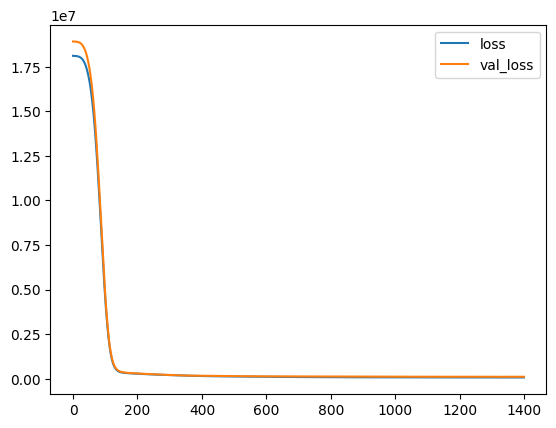

In [17]:
losses.plot()

In [18]:
loss = model.history.history['loss']

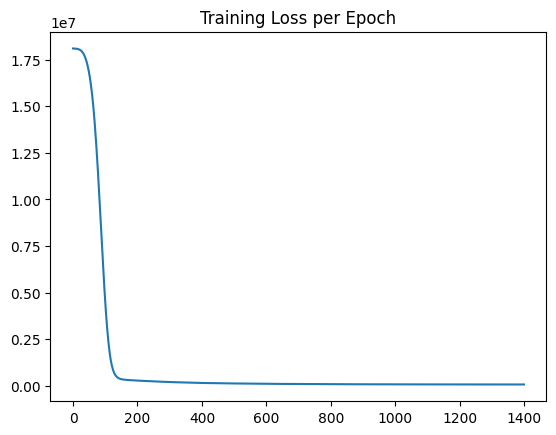

In [19]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [20]:
model.metrics_names

['loss']

In [21]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [22]:
training_score

66790.9921875

In [23]:
test_score

106760.703125

In [24]:
test_predictions = model.predict(X_test)

4/4 [==============================] - 0s 833us/step


In [25]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)

In [26]:
pred_df

,body_mass_g
0,5200.0
1,3875.0
2,3700.0
3,4550.0
4,5400.0
...,...
95,5650.0
96,4950.0
97,5950.0
98,4800.0


In [27]:
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))

In [28]:
test_predictions

0     4620.436523
1     4232.937012
2     3453.583984
3     4690.341309
4     5555.648926
         ...     
95    5850.784180
96    4597.501465
97    5617.305176
98    4607.230469
99    3435.456299
Length: 100, dtype: float32

In [29]:
pred_df['Model_Predictions'] = test_predictions

In [30]:
pred_df.columns = ['Test Y','Model Predictions']

In [31]:
pred_df

,Test Y,Model Predictions
0,5200.0,4620.436523
1,3875.0,4232.937012
2,3700.0,3453.583984
3,4550.0,4690.341309
4,5400.0,5555.648926
...,...,...
95,5650.0,5850.784180
96,4950.0,4597.501465
97,5950.0,5617.305176
98,4800.0,4607.230469


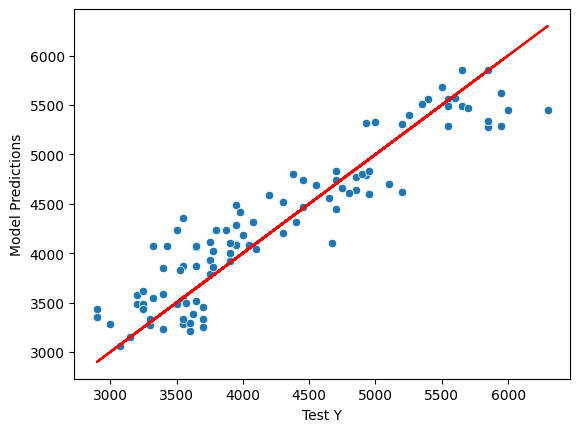

In [46]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)
plt.plot(y_test,y_test,'r')

In [33]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

C:\Users\andre\AppData\Local\Temp\ipykernel_6592\1928191693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50);


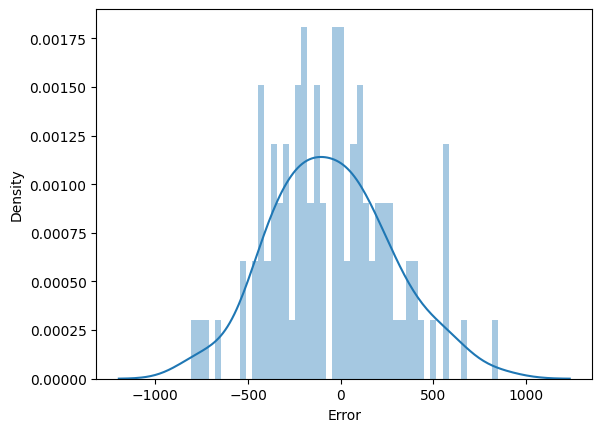

In [34]:
sns.distplot(pred_df['Error'],bins=50);

In [35]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(pred_df["Test Y"],pred_df["Model Predictions"])}')
print(f'Mean Squared Error: {metrics.mean_squared_error(pred_df["Test Y"],pred_df["Model Predictions"])}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(pred_df["Test Y"],pred_df["Model Predictions"]))}')

Mean Absolute Error: 262.16287109375
Mean Squared Error: 106760.7055275929
Root Mean Squared Error: 326.7425676700128


In [45]:
np.sqrt(metrics.mean_squared_error(pred_df["Test Y"],pred_df["Model Predictions"]))/pred_df["Test Y"].mean()

0.07670913667566917

In [39]:
metrics.explained_variance_score(pred_df["Test Y"],pred_df["Model Predictions"])

0.8640743964185436

## Saving and Loading a Model

In [36]:
from tensorflow.keras.models import load_model

In [37]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [38]:
later_model = load_model('my_model.h5')